<a href="https://colab.research.google.com/github/thrcle/DeepLearning/blob/main/AdvancedDeeplearingMNISTCNNSaveEarlyStopping_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#keras

Sequential(): linear stack of layers
summmary() : print summary representation of your model #param에 대한 정보

 


In [ ]:
# early stopping ㅣ 모델이 불안정할 때는 좋은 건 아님. 

In [ ]:
# 4-1-4. 딥러닝 프로그램

In [ ]:
# 체크포인트
# 콜백 매개변수

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define constants
batch_size=128
epochs=100
num_classes=10

In [ ]:
mnist=keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
len(train_images), len(test_images)

(60000, 10000)

In [ ]:
# Normalize the input image so that each pixel value is between 0 to 1. 머신러닝에서는 작은 실수를 넣어주는 게 더 좋음
train_images = train_images / 255.0   #tensorflow는 실수일 때 계산 용이
test_images = test_images / 255.0

하나의 hidden layer를 convolutional layer로 바꿔줌. cnn 사용 - accuracy 향상 

In [ ]:
# Define the model architecture with CNN
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),# Flatten : 1차원으로 변경
                                                                                                                                      #Hidden Layers
                                                                                                                                      #keras.layers.Dense(128, activation=tf.nn.relu)         # Dense : 노드 간 모두 연결 .   128개의 유닛이 있음 #hidden layer
            
                         keras.layers.Reshape(target_shape=(28, 28, 1)),  # 2d로 변경 (Conv2D, MaxPooling2D 사용을 위해)
                         keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
                         keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
                         keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Max값 argmax (pooling)
                         keras.layers.Dropout(0.25), # dropout: 신경망학습에 사용되는 정규화
                         keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation=tf.nn.relu),
                         keras.layers.Dropout(0.5),

                         keras.layers.Dense(num_classes, activation='softmax') # multi sigmoid= softmax
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Crossentropy : 원핫인코딩값과 probability 값을 곱해줌 
              metrics=['accuracy'])

In [ ]:
filepath='/model/digit_model.h5'
modelCheckpoint=tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True)

In [ ]:
# Define a callback to monitor val_loss
monitorEarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)  # 튀는 값(loss값이 증가한 것)을 5번 허용 => epoch을 많이 설정해도 조건 충족시 중단됨
# patience= 기다림 localminimum

In [ ]:
history=model.fit(train_images, train_labels, 
                  validation_data=(test_images, test_labels),   # validaton data 추가
                  epochs=epochs, batch_size=batch_size,  # epoch= 반복학습 수, batch_size=학습 단위=> 한장씩 풀고 답맞추기 vs 한권 다 풀고 답맞추기
                  callbacks=[modelCheckpoint, monitorEarlyStop])         

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


469/469 [==============================] - 17s 17ms/step - loss: 0.2582 - accuracy: 0.9214 - val_loss: 0.0544 - val_accuracy: 0.9823
Epoch 2/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0910 - accuracy: 0.9725 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 3/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0724 - accuracy: 0.9784 - val_loss: 0.0385 - val_accuracy: 0.9870
Epoch 4/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0576 - accuracy: 0.9825 - val_loss: 0.0348 - val_accuracy: 0.9889
Epoch 5/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 6/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0422 - accuracy: 0.9866 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 7/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0294 - val_accuracy: 0.9908
Epo

In [ ]:
# test set으로 성능확인
# Evaluate the model using test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0489 - accuracy: 0.9924
Test Accuracy:  0.9923999905586243


Download

In [ ]:
# Download the digit classification model if you're using Colab,     코랩에서 파일 직접 download
# or print the model's local path if you're not using Colab.
def download(path):
    try:
        from google.colab import files
        files.download(path)
    except ImportError:
        import os
        print('Error download:', os.path.join(os,getcwd(), path))

In [ ]:
download(filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
savefile='saved_digits.h5'
model.save(savefile)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 reshape_5 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                      

In [ ]:
!ls -al

total 14132
drwxr-xr-x 1 root root     4096 Apr  9 05:34 .
drwxr-xr-x 1 root root     4096 Apr  9 05:21 ..
drwxr-xr-x 4 root root     4096 Mar 23 14:21 .config
drwx------ 5 root root     4096 Apr  9 04:27 drive
drwxr-xr-x 1 root root     4096 Mar 23 14:22 sample_data
-rw-r--r-- 1 root root 14448080 Apr  9 05:34 saved_digits.h5


In [ ]:
# Load Model
load_model = tf.keras.models.load_model(savefile)

In [ ]:
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 reshape_5 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                      

In [ ]:
import math

In [ ]:
# Helper function to display digit images
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

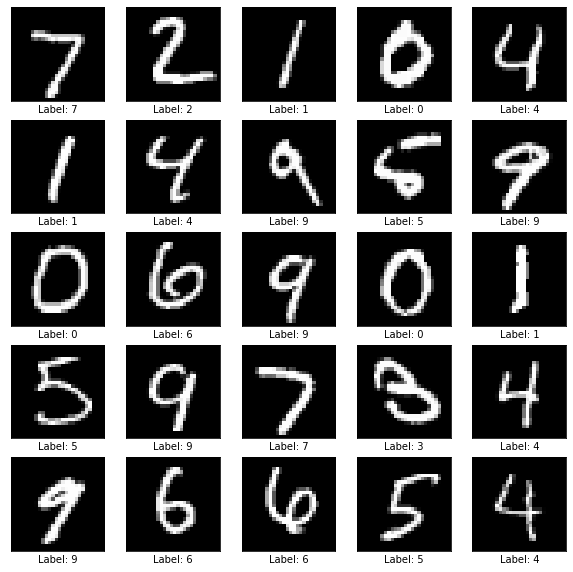

In [ ]:
# Show the first 25 images in the training dataset.
show_sample(test_images, ['Label: %s' % label for label in test_labels])

In [ ]:
# Helper function to display specific digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0
  digit_count = 0
  while digit_count < sample_count:
    i += 1
    if (digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()

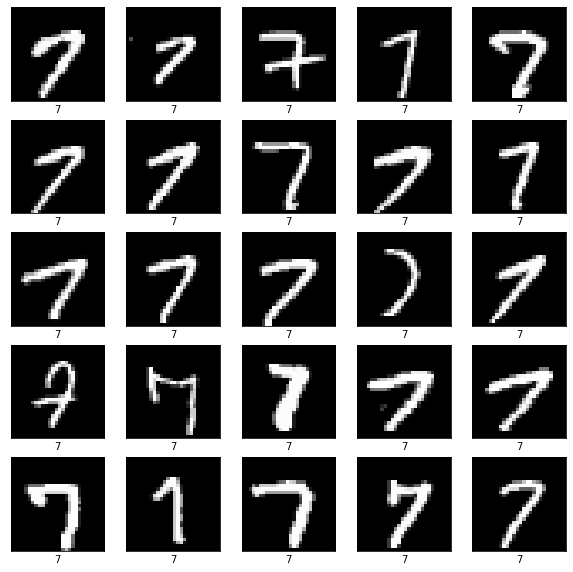

In [ ]:
# Show digit 7 the first 25 images in the training dataset.
show_sample_digit(train_images, train_labels, 7)

Text(0, 0.5, 'accuracy')

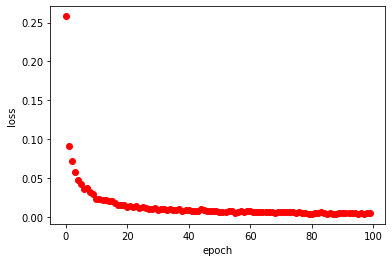

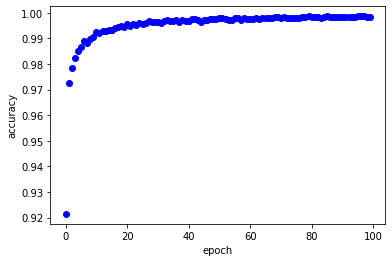

In [ ]:
# Evaluate the model using test dataset. - Show performance

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['accuracy'], 'bo')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')

In [ ]:
# Predict the labels of digit images in our test dataset.
predictions = model.predict(test_images)

print([result for result in predictions])      # 0~9까지의 확률 

[array([4.23898643e-38, 6.33308074e-23, 1.56329321e-26, 1.50355162e-21,
       1.85021911e-28, 1.48681448e-32, 0.00000000e+00, 1.00000000e+00,
       1.43433995e-33, 4.49915576e-25], dtype=float32), array([4.6078428e-22, 3.0490336e-18, 1.0000000e+00, 8.7027435e-24,
       4.9597454e-34, 2.5190773e-38, 7.2002946e-21, 3.9053319e-30,
       7.9954765e-31, 1.9388191e-37], dtype=float32), array([7.4964401e-28, 1.0000000e+00, 6.1952339e-22, 1.2475796e-25,
       7.2126794e-17, 6.3607579e-22, 1.6297825e-20, 9.0470671e-18,
       5.1336786e-22, 6.1785681e-23], dtype=float32), array([1.0000000e+00, 9.0674333e-22, 8.5791766e-22, 1.9554497e-22,
       6.9519737e-23, 1.2578468e-21, 5.8670811e-12, 8.4929484e-23,
       4.1014012e-20, 4.6741452e-21], dtype=float32), array([1.02441224e-25, 2.10374146e-22, 5.19285785e-25, 2.56875663e-27,
       1.00000000e+00, 2.13842930e-21, 8.67181974e-25, 1.23245489e-21,
       1.52052586e-22, 2.23754324e-14], dtype=float32), array([9.8526060e-28, 1.0000000e+00, 2.

In [ ]:
print([np.argmax(result) for result in predictions])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 8, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

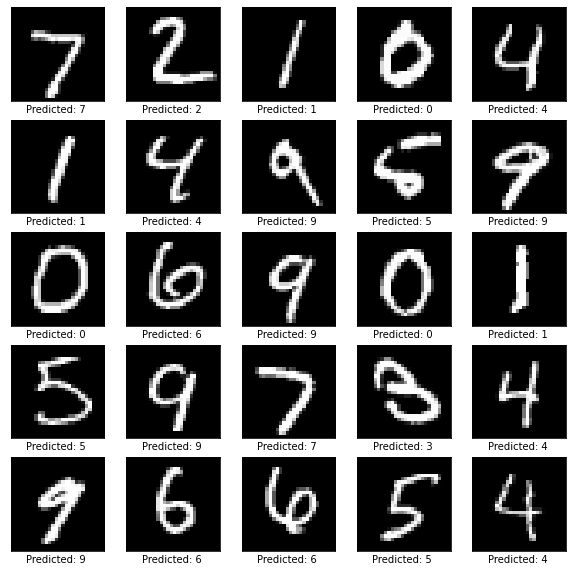

In [ ]:

# Then plot the first 25 test images and their predicted labels.
show_sample(test_images, ['Predicted: %d ' % np.argmax(result) for result in predictions])   # show_sample() parameter : (images, labels)
                                                                                             # one-hot 으로 된 경우에는 argmax 사용

In [ ]:
# Helper function to display specific digit images
def show_digit_image(image):
  # Draw digit image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  # Major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  # And a corresponding grid
  ax.grid(which='both')
  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)
  ax.imshow(image, cmap=plt.cm.binary)

  plt.show()

3
Real number


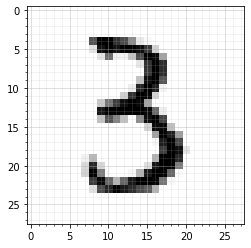

In [ ]:
digit = 1738 #@param {type:"slider", min:0, max:10000, step:1}
predictionResult=np.argmax(predictions[digit])
print(predictionResult)
print("Real number")
show_digit_image(test_images[digit])